ガウス展開法の検証(０が反映されていない？)

In [17]:
import torch.nn as nn
import torch
import numpy as np
class GaussianHistogram(nn.Module):
    def __init__(self, bins, min, max, sigma):
        super(GaussianHistogram, self).__init__()
        self.bins = bins
        self.min = min
        self.max = max
        self.sigma = sigma
        self.delta = float(max - min) / float(bins)
        self.centers = float(min) + self.delta * (torch.arange(bins).float() + 0.5)

    def forward(self, x):
        x = torch.unsqueeze(x, 0) - torch.unsqueeze(self.centers, 1)
        x = torch.exp(-0.5*(x/self.sigma)**2) / (self.sigma * np.sqrt(np.pi*2)) * self.delta
        x = x.sum(dim=1)
        return x
    
DayProp = [
    [1, 0, 0, 0],#day0(red, blue, yellow, orange)
    [0, 0.5, 0.5, 0],#day3
    [0, 0.06, 0.28, 0.66],#day5
    [0.07, 0.04, 0.06, 0.83]#day7
]

#クラス距離の定義
ClassDiver = [
    [1,   2/3,  0,  2/3], #red-red, red-blue, red-yellow, red-orange
    [2/3,  1,   0,  1/3], #blue-red, blue-blue, blue-yellow, blue-orange
    [1,    0,   1,  1/3], #yellow-red, yellow-blue, yellow-yellow, yellow-orange
    [2/3, 1/3, 1/3,  1 ]  #orange-red, orange-blue, orange-yellow, orange-orange
]

#class同士のsimを返す
def Class_Divergence(classA, classB):
    return ClassDiver[classA][classB]     

#クラス同士のsimの数を格納した配列をdatalen長で返す
def DayCombo_to_FeatNumData(dayA, dayB, datalen):
    data = torch.zeros(datalen)
    data_itr = 0
    for clsA, propA in enumerate(DayProp[dayA]):
        for clsB, propB in enumerate(DayProp[dayB]):
            add_data_num = int(propA * propB * datalen)
            data[data_itr:add_data_num] = Class_Divergence(clsA, clsB)
            data_itr += add_data_num     
    return data

tensor([0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667,
        0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667,
        0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667,
        0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667,
        0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667,
        0.6667, 0.6667, 0.6667, 0.6667, 0.6667])
torch.Size([50])


(0.0, 1.0)

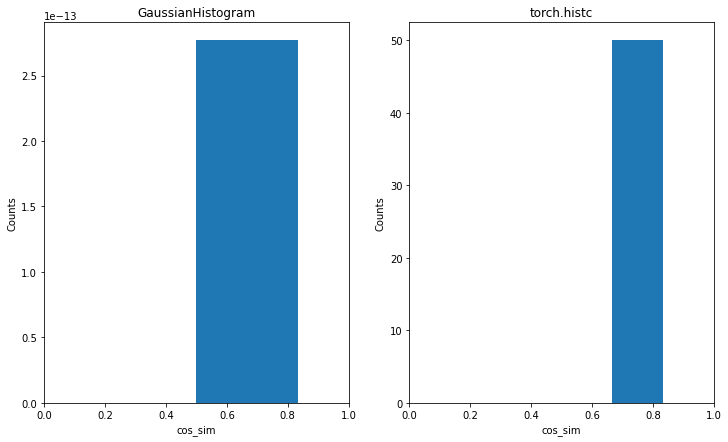

In [29]:
data = DayCombo_to_FeatNumData(1, 0, 50)
print(data)
bins = 6

import matplotlib.pyplot as plt
print(data.shape)
a = GaussianHistogram(bins=bins, min=0, max=1, sigma=0.01)(data)
b = torch.histc(data, bins=bins, min=0, max=1)

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.bar(torch.linspace(0, 1, bins+1)[:-1], a, width=1/bins, align='edge')
plt.title('GaussianHistogram')
plt.xlabel('cos_sim')
plt.ylabel('Counts')
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(torch.linspace(0, 1, bins+1)[:-1], b, width=1/bins, align='edge')
plt.title('torch.histc')
plt.xlabel('cos_sim')
plt.ylabel('Counts')
plt.xlim(0, 1)